# Trabajo de investigación

**Indicaciones** Todo debe ser desarrollado en este mismo Notebook. Haciendo uso de las celdas de Python y Markdown.

### Parte 1
1. Descargar el archivo en formato csv disponible en el blackboard llamado carga_ganadera.csv
2. El objetivo con este dataset es realizar las siguientes tareas:
   - Limpieza de datos
   - Tratamiento de datos
   - Generación de un modelo de Regresión y Clasificación
   - Visualización de datos
   - Evaluación de métricas por
3. La última sección consiste en desarrollar analizar métricas de clasificación 

### Parte 2
Revisar el índide Latinoamericano de Inteligencia Artificial https://indicelatam.cl/. También disponible en PDF en el blackboard.
Responder a las siguientes preguntas:
1. ¿Cuál es el objetivo principal del Índice Latinoamericano de IA y cómo se mide el progreso en la región?
2. ¿Qué países de Latinoamérica lideran actualmente el ranking del Índice Latinoamericano de IA y por qué?
3. ¿Cuáles son los principales desafíos que enfrenta la región para avanzar en la adopción y desarrollo de la Inteligencia Artificial?
4. ¿De qué manera el Índice Latinoamericano de IA considera la ética y la responsabilidad social en el desarrollo de la IA?
5. ¿Qué iniciativas gubernamentales y privadas están impulsando el desarrollo de la IA en Latinoamérica y cómo se reflejan en el Índice Latinoamericano de IA? 
6. De acuerdo al índice latinoamericano de IA ¿Cuál es el potencial del desarrollo de la inteligencia artificial en el Perú? 
7. ¿Qué iniciativas puede tomar en el Perú para ascender en el índice latinoamericano?


### Parte 3
A Brief History of Artificial Intelligence: What It Is, Where We Are, and Where We Are Going
Author: Michael Wooldridge

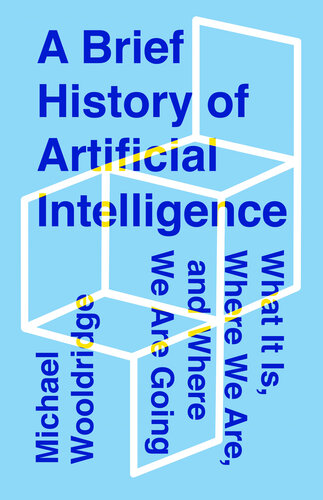

**Distribución de temas**

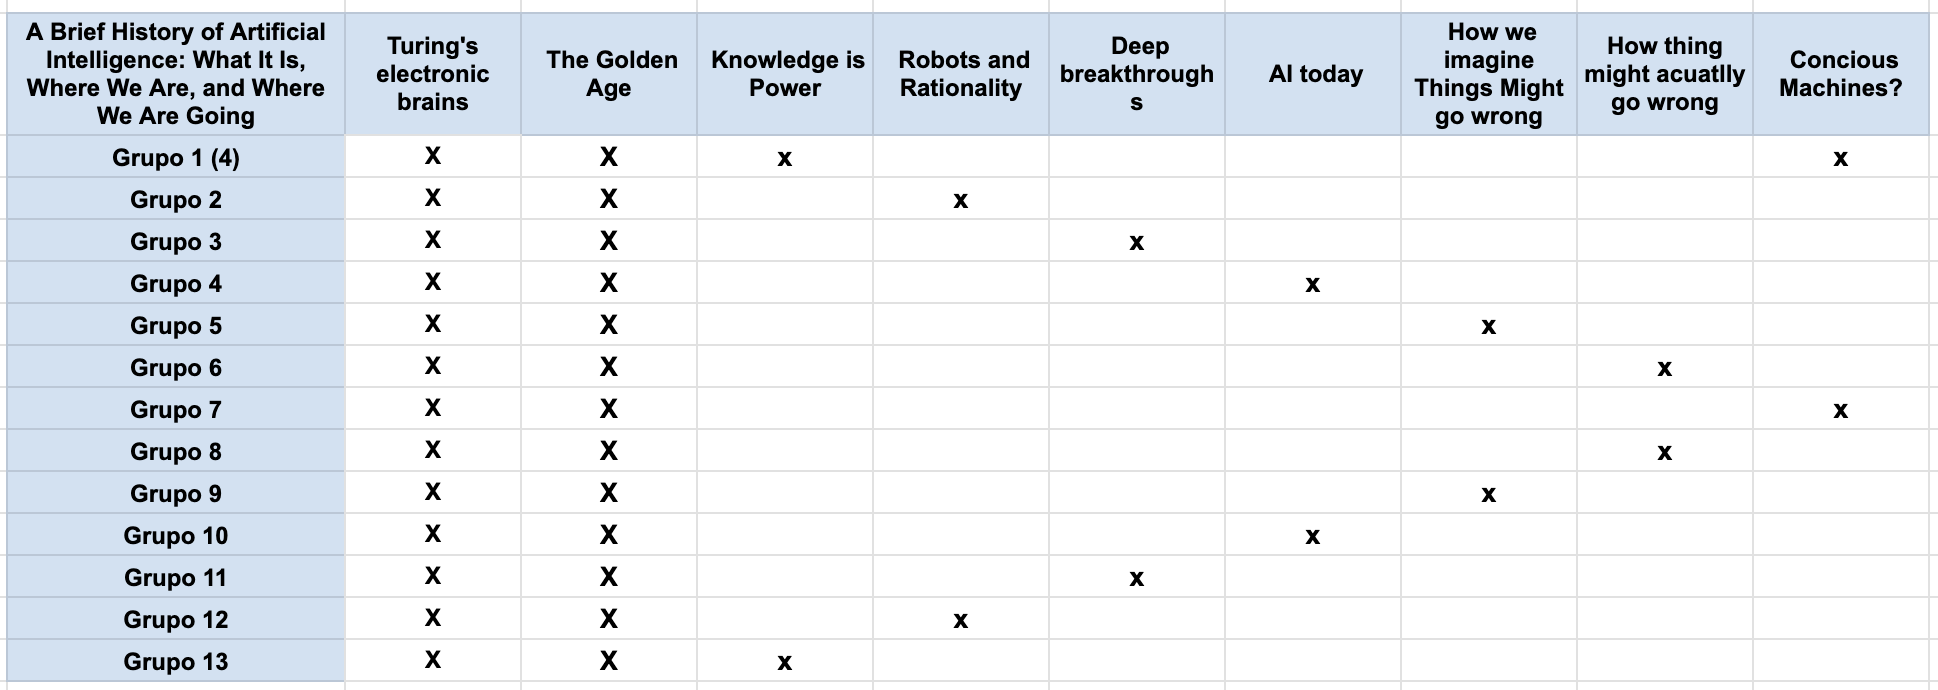

El objetivo es extraer 4 oraciones clave y 3 ideas (del grupo) sobre el capítulo.

### Rúbrica
| **Parte** | **Calificación** |
|-----------|--------------|
| Parte 1.1 | 6 pts |
| Parte 1.2 | 5 pts |
| Parte 2 | 4 pts |
| Parte 3 | 5 pts|

----
## Desarrollo

## Parte 1: Desarrollo de redes neuronales
Objetivos: 
1. Identificar columnas numéricas y columnas categóricas.
2. Diseñar una red de neuronas para resolver un problema de **regresión**.
3. Utilizar métricas para evaluar el modelo generado.

### 1.1 Datos ganaderos de Catalunya
Se trabajará únicamente con las columnas: [CODI POSTAL EXPLOTACIO,SERVEI TERRITORIAL  EXPLOTACIÓ,PROVINCIA EXPLOTACIÓ,COMARCA EXPLOTACIÓ,MUNICIPI EXPLOTACIÓ,TIPUS EXPLOTACIÓ,ESPÈCIE, INTEGRADORA, NOM ADS,CLASSIFICACIÓ ZOOTÈCNICA,DATA CLASSIFICACIÓ ZOOTÈCNICA,SISTEMA PRODUCTIU,CRITERI DE SOSTENIBILITAT,CAPACITAT PRODUCTIVA,TOTAL CAP PONEDORES,TOTAL URM,TOTAL NITROGEN].

El modelo a generar debe trabajar con TOTAL_URM o TOTAL_NITROGEN como variable a predecir. A elección del grupo. 

In [1]:
import pandas as pd 

data = pd.read_csv('carga_ganadera.csv')

columnas = [
    'CODI POSTAL EXPLOTACIO', 'SERVEI TERRITORIAL  EXPLOTACIÓ', 'PROVINCIA EXPLOTACIÓ',
    'COMARCA EXPLOTACIÓ', 'MUNICIPI EXPLOTACIÓ', 'TIPUS EXPLOTACIÓ', 'ESPÈCIE', 
    'INTEGRADORA', 'NOM ADS', 'CLASSIFICACIÓ ZOOTÈCNICA', 'DATA CLASSIFICACIÓ ZOOTÈCNICA',
    'SISTEMA PRODUCTIU', 'CRITERI DE SOSTENIBILITAT', 'CAPACITAT PRODUCTIVA', 
    'TOTAL CAP PONEDORES', 'TOTAL URM', 'TOTAL NITROGEN'
]

data = data[columnas]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26338 entries, 0 to 26337
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODI POSTAL EXPLOTACIO          26331 non-null  float64
 1   SERVEI TERRITORIAL  EXPLOTACIÓ  26338 non-null  object 
 2   PROVINCIA EXPLOTACIÓ            26338 non-null  object 
 3   COMARCA EXPLOTACIÓ              26338 non-null  object 
 4   MUNICIPI EXPLOTACIÓ             26338 non-null  object 
 5   TIPUS EXPLOTACIÓ                26338 non-null  object 
 6   ESPÈCIE                         26338 non-null  object 
 7   INTEGRADORA                     5895 non-null   object 
 8   NOM ADS                         11422 non-null  object 
 9   CLASSIFICACIÓ ZOOTÈCNICA        19246 non-null  object 
 10  DATA CLASSIFICACIÓ ZOOTÈCNICA   19206 non-null  object 
 11  SISTEMA PRODUCTIU               26006 non-null  object 
 12  CRITERI DE SOSTENIBILITAT       

In [3]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['SERVEI TERRITORIAL  EXPLOTACIÓ', 'PROVINCIA EXPLOTACIÓ',
       'COMARCA EXPLOTACIÓ', 'MUNICIPI EXPLOTACIÓ', 'TIPUS EXPLOTACIÓ',
       'ESPÈCIE', 'INTEGRADORA', 'NOM ADS', 'CLASSIFICACIÓ ZOOTÈCNICA',
       'DATA CLASSIFICACIÓ ZOOTÈCNICA', 'SISTEMA PRODUCTIU',
       'CRITERI DE SOSTENIBILITAT', 'CAPACITAT PRODUCTIVA'],
      dtype='object')

**1.1.1 Conversión a One-Hot Encoding**
___

In [4]:
# 1.1.1 Convertir las columnas categóricas a one-hot encoding. (1 ptos)

from sklearn.preprocessing import OneHotEncoder

x_categorical = data[categorical_columns]
encoder = OneHotEncoder(handle_unknown='ignore')

x_encoded = encoder.fit_transform(x_categorical)

categorical_encoded_columns = [
    f'{col}_{cat}' for i, col in enumerate(x_categorical.columns) for cat in encoder.categories_[i]
]

x_encoded_df = pd.DataFrame(x_encoded.toarray(), columns=categorical_encoded_columns)
df = pd.concat([data.drop(columns=categorical_columns), x_encoded_df], axis=1)

df.head()

,CODI POSTAL EXPLOTACIO,TOTAL CAP PONEDORES,TOTAL URM,TOTAL NITROGEN,SERVEI TERRITORIAL EXPLOTACIÓ_Alt Pirineu,SERVEI TERRITORIAL EXPLOTACIÓ_Barcelona,SERVEI TERRITORIAL EXPLOTACIÓ_Catalunya Central,SERVEI TERRITORIAL EXPLOTACIÓ_Girona,SERVEI TERRITORIAL EXPLOTACIÓ_Lleida,SERVEI TERRITORIAL EXPLOTACIÓ_Tarragona,...,CRITERI DE SOSTENIBILITAT_Integrat,CRITERI DE SOSTENIBILITAT_nan,CAPACITAT PRODUCTIVA_Grup I,CAPACITAT PRODUCTIVA_Grup II,CAPACITAT PRODUCTIVA_Grup III,CAPACITAT PRODUCTIVA_Grup IV,CAPACITAT PRODUCTIVA_No professional,CAPACITAT PRODUCTIVA_Professional,CAPACITAT PRODUCTIVA_Reduida,CAPACITAT PRODUCTIVA_nan
0,25651.0,0,5.80,372.05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25651.0,0,290.88,17574.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25651.0,0,4.00,255.20,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25651.0,0,4.00,255.20,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25651.0,0,197.02,11875.25,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(26338, 5402)

**1.1.2 Red Neuronal para TOTAL_URM  -  random_stare=42**
___

In [6]:
# 1.1.2 Construir una red de neuronas para identificar el `TOTAL_URM` o `TOTAL_NITROGEN`. (3.5 ptos) 
# Se evaluará el loss function utilizado en cada capa.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf

target_variable = 'TOTAL URM'

x = df.drop(columns=[target_variable])
y = df[target_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[x_train_scaled.shape[1]])) 
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

d:\2024-2\MACH. LEARNING\ML_ACTIVIDADES\.env\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,106,591 (4.22 MB)

 Trainable params: 1,106,591 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

**1.1.3 Evaluación de desenvolvimiento del modelo - 50 épocas**
___

In [8]:
# 1.1.3 Evaluar el desenvolvimiento del modelo según las épocas en el entrenamiento (1.5 ptos) 
# utilice métricas como MSE, RMSE, MAE pero también el loss function 

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mean_absolute_error']
)

history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 18975.3750 - mean_absolute_error: 71.9448 - val_loss: 14838.1562 - val_mean_absolute_error: 78.1764
Epoch 2/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 19460.9727 - mean_absolute_error: 82.5908 - val_loss: 14848.5146 - val_mean_absolute_error: 79.5276
Epoch 3/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 18637.8125 - mean_absolute_error: 82.8487 - val_loss: 14890.3525 - val_mean_absolute_error: 81.1864
Epoch 4/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 17227.4023 - mean_absolute_error: 81.2389 - val_loss: 14883.3848 - val_mean_absolute_error: 80.9761
Epoch 5/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 20053.7656 - mean_absolute_error: 82.8032 - val_loss: 14856.5771 - val_mean_absolute_error: 79.9626
Epoch 6/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 18333.0586 - mean_absolute_error: 81.9874 - val_loss: 14842.6982 - val_mean_absolute_error: 79.0905
Epoch 7/50
659/659 ━━━━━━━━━━

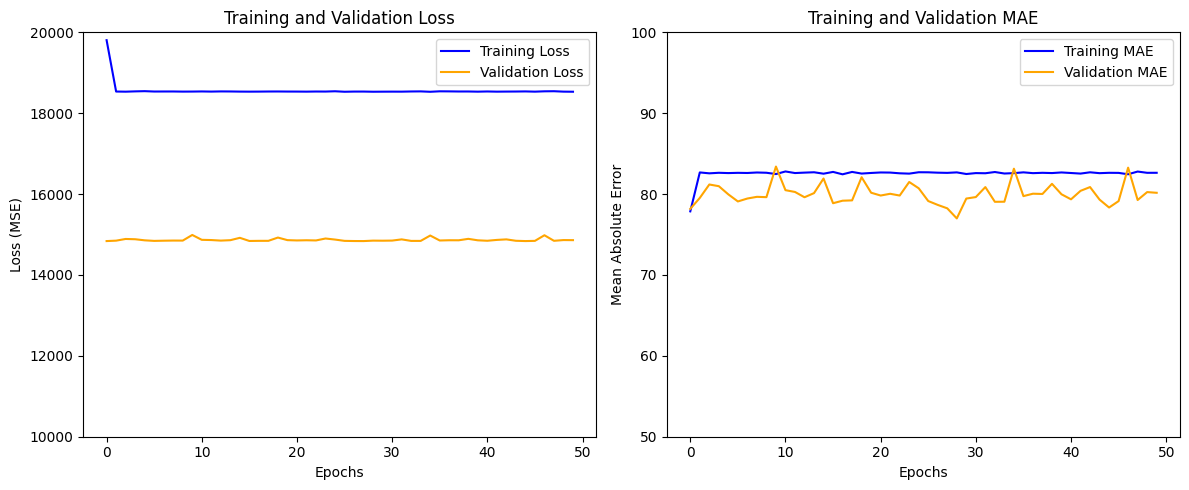

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss', color='blue')
plt.plot(history_dict['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.ylim(10000,20000)
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history_dict['val_mean_absolute_error'], label='Validation MAE', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.ylim(50,100)
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()


Explicacion

### 1.2 Datos jugadores del FIFA
El dataset en la actividad incluye información sobre la performance de cada jugador en el juego FIFA. 

1. Tratamiento de los datos. Cada jugador tiene una posición determinada `team_position` y según la columna que tiene el mismo valor, tiene un puntaje. (0.5 pts)
   1. De acuerdo a ese puntaje, asignar las siguientes categorías:
      * Poor:[46.0, 62.0]
      * Interm:[63.0, 66.0]	
      * Good:[67.0, 71.0]	
      * Excel:[72.0, 94.0]   
2. Generación del modelo de clasificación, tomando en cuenta esta nueva columna a partir de las columnas (2.5 pts)
   * Considera las siguientes columnas como features: `attacking_crossing	attacking_finishing	attacking_heading_accuracy	attacking_short_passing	attacking_volleys	skill_dribbling	skill_curve	skill_fk_accuracy	skill_long_passing	skill_ball_control	movement_acceleration	movement_sprint_speed	movement_agility	movement_reactions	movement_balance	power_shot_power	power_jumping	power_stamina	power_strength	power_long_shots	mentality_aggression	mentality_interceptions	mentality_positioning	mentality_vision	mentality_penalties	mentality_composure	defending_marking	defending_standing_tackle	defending_sliding_tackle	goalkeeping_diving	goalkeeping_handling	goalkeeping_kicking	goalkeeping_positioning	goalkeeping_reflexes`. 
3. Generar el análisis y gráficas para analizar la performance del modelo. (2 pts)

In [15]:
data_players = pd.read_csv('players_20.csv')
data_players.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


**1.2.1 Tratamiento de datos**
___

In [17]:
# Borramos los que tengan NA 
data_players = data_players.dropna(subset=['rw'])

# Nos quedamos solo con los números antes del "+"
def extract_main_score(rw_value):
    return int(str(rw_value).split('+')[0])

# Aplicamos la función a la columna 'RW'
data_players['rw_score'] = data_players['rw'].apply(extract_main_score)
data_players = data_players.dropna(subset=['rw_score'])

In [19]:
# Clasificación según el puntaje en la columna 'rw_score'
def categorize_performance(score):
    if 46 <= score <= 62:
        return 'Poor'
    elif 63 <= score <= 66:
        return 'Interm'
    elif 67 <= score <= 71:
        return 'Good'
    elif 72 <= score <= 94:
        return 'Excel'
    else:
        return 'Unknown'

# Aplicamos la función para crear la nueva columna categorizada
data_players['categoria_rw'] = data_players['rw_score'].apply(categorize_performance)

# Eliminamos las filas con la categoría 'Unknown' (si existieran)
data_players = data_players[data_players['categoria_rw'] != 'Unknown']

**1.2.2 Modelo de clasificación**
___

In [22]:
features = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power',
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
    'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
    'goalkeeping_positioning', 'goalkeeping_reflexes'
]

x = data_players[features]
y = data_players['categoria_rw']

## Parte 2: Índice latinoamericano de IA
Revisar el índide Latinoamericano de Inteligencia Artificial https://indicelatam.cl/. También disponible en PDF en el blackboard.
Responder a las siguientes preguntas:

1. ¿Cuál es el objetivo principal del Índice Latinoamericano de IA y cómo se mide el progreso en la región? **(0.5 pts)**


> El ILIA tiene como objetivo ayudar a que la Inteligencia Artificial se desarrolle de manera más inclusiva en América Latina. Busca aprovechar las oportunidades, identificar las diferencias que aún existen, y ayudar a impulsar acciones concretas para que la IA avance de manera beneficiosa para todos en la región. Para medir cómo vamos, el índice usa más de 70 indicadores, organizados en dimensiones como Factores Habilitantes, Investigación, Desarrollo y Gobernanza. 

2. ¿Qué países de Latinoamérica lideran actualmente el ranking del Índice Latinoamericano de IA y por qué? **(0.5 pts)**

> En el ILIA 2024, los países que están liderando el camino son Chile, Brasil y Uruguay. Lo que los hace destacar es su trabajo en diferentes áreas clave, como tener una buena infraestructura tecnológica, fomentar el talento especializado, promover la ciencia y la innovación. Estos países se encuentran en lo que se llama el "Cuadrante I", lo que básicamente significa que tienen un entorno bastante favorable para el desarrollo de la IA y, por eso, están bien posicionados para ser líderes regionales.

3. ¿Cuáles son los principales desafíos que enfrenta la región para avanzar en la adopción y desarrollo de la Inteligencia Artificial? **(0.5 pts)**

> Algunos de los grandes problemas que enfrenta la región para desarrollar la IA incluyen la falta de talento especializado y la dificultad para retener a los expertos que se forman, ya que muchos terminan yéndose a otros países. Además, falta infraestructura adecuada, como computadoras de alto rendimiento y acceso a redes rápidas. También hay una gran brecha de género, lo que significa que las mujeres aún están subrepresentadas tanto en los estudios como en el uso de la IA.

4. ¿De qué manera el Índice Latinoamericano de IA considera la ética y la responsabilidad social en el desarrollo de la IA? **(0.5 pts)**

> El índice también se preocupa por el aspecto ético y la responsabilidad social en el desarrollo de la IA. Evalúa qué tan bien los países están integrando estrategias de IA que respeten estos valores, incluyendo marcos regulatorios para asegurarse de que todo se haga de manera responsable. Por ejemplo, menciona la Metodología RAM de la UNESCO, que sirve como una guía para lograr una IA más ética. Además, hay iniciativas conjuntas con universidades para crear algoritmos más transparentes y justos.

5. ¿Qué iniciativas gubernamentales y privadas están impulsando el desarrollo de la IA en Latinoamérica y cómo se reflejan en el Índice Latinoamericano de IA? **(0.5 pts)**

> En América Latina, hay iniciativas tanto del gobierno como del sector privado para apoyar el desarrollo de la IA. Algunos ejemplos incluyen la inversión en infraestructura tecnológica con apoyo de la CAF y la creación del Grupo de Trabajo por la Ética de la IA, que nació durante la Cumbre de Santiago. También hay programas del BID que buscan ayudar a que más empresas adopten la IA. A nivel privado, grandes empresas como Google, Microsoft y AWS están poniendo su grano de arena para que el desarrollo de la IA en la región sea más equilibrado y responsable.

6. De acuerdo al índice latinoamericano de IA ¿Cuál es el potencial del desarrollo de la inteligencia artificial en el Perú? **(0.5 pts)**

> Perú tiene un gran potencial, pero enfrenta algunos desafíos importantes. En el índice, Perú está en el "Cuadrante III" en lo que respecta a infraestructura y desarrollo de la IA, lo que significa que hay mucho por mejorar. Sin embargo, en el aspecto de gobernanza, está un poco mejor, en el "Cuadrante II", lo que indica que hay un buen ambiente regulatorio. Si Perú logra mejorar en las áreas donde hay más problemas, podría aprovechar mucho mejor las oportunidades que trae la IA.

7. ¿Qué iniciativas puede tomar en el Perú para ascender en el índice latinoamericano? **(1 pts)**

> Para que Perú pueda avanzar en el Índice Latinoamericano de Inteligencia Artificial, lo primero es ponerle atención a la infraestructura tecnológica: mejorar la conectividad, apostar por el 5G y contar con mejor capacidad de computación. Sin esto, no se puede competir. Además, hay que trabajar en formar y retener talento especializado. No basta con educar, también hay que hacer atractivo quedarse en el país. Es clave tener acceso a datos de calidad, y para eso se necesita infraestructura que los respalde y políticas que aseguren su uso responsable. También necesitamos marcos regulatorios que promuevan la IA de forma ética, apoyando tanto la inversión pública como la privada.

## Parte 3: Historia de la Inteligencia Artificial

**Objetivo:** Extraer 4 oraciones clave y 3 ideas (del grupo) sobre el capítulo.

1. Capítulo 1
   1. Oración clave 1
   2. Oración clave 2
   3. Oración clave 3
   4. Oración clave 4

1. Capítulo 2
   1. Oración clave 1
   2. Oración clave 2
   3. Oración clave 3
   4. Oración clave 4

1. Capítulo 3
   1. Oración clave 1
   2. Oración clave 2
   3. Oración clave 3
   4. Oración clave 4

1. Capítulo 4 (Solo grupo 1)
   1. Oración clave 1
   2. Oración clave 2
   3. Oración clave 3
   4. Oración clave 4

1. Ideas (del grupo)
   1. Idea 1
   2. Idea 2
   3. Idea 3
   4. Idea 4 (solo grupo 1)